# Análise Exploratória de Dados com Python
Referência: https://medium.com/@aasouzaconsult/python-para-an%C3%A1lise-de-dados-24028d7013b3 

A análise exploratória de dados ou, em resumo, EDA (do inglês: Exploratory Data Analysis) é uma abordagem para analisar dados para resumir as principais características dos dados, obter uma melhor compreensão do conjunto de dados, descobrir relacionamentos entre diferentes variáveis ​​e extrair variáveis ​​importantes. EDA, é um passo importante em qualquer projeto de Análise de Dados ou Ciência de Dados.

O principal objetivo da EDA é detectar quaisquer erros ou discrepâncias, bem como entender diferentes padrões nos dados. Ele permite que os analistas entendam melhor os dados antes de fazer qualquer suposição e também descubram relacionamentos entre variáveis. Os resultados da EDA ajudam as empresas a conhecer seus clientes, expandir seus negócios e tomar melhores decisões.

### Bibliotecas necessárias para EDA

In [238]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# instalando a xlrd
!pip install xlrd --upgrade

# Colab
# from google.colab import drive
# drive.mount('/content/drive')

### Informações da base de dados

In [239]:
# Importando arquivo do Excel "carros_usados.xls"
df = pd.read_excel('carros_usados.xls')

In [240]:
# Visualizando primeiras 5 linhas do DataFrame
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [241]:
# Informações das colunas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


Nesse exemplo, a base de dados é de uma concessionária de veículos e trata das vendas de veículos usados. Para entender melhor esse conjunto de dados, uma descrição das colunas é apresentada a seguir:

- data.set - Dado de treino ou de test
- total.cost - Custo total do veiculo
- lot.sale.days - Tempo de venda em dias
- overage - Venda após 90 dias
- mileage - Kilometragem
- vehicle.type - Tipo do veículo (economy, family.medium, family.large...)
- domestic.import - Fabricação, domestico ou importado
- vehicle.age - Idade do veículo
- vehicle.age.group - Grupo de idade do veículo
- color.set - Cor
- makex - Marca
- state - Estado do Carro (região)
- make.model - Modelo

Para se obter informações como contagem, média, mínimo, máximo, desvio padrão, percentis:

In [242]:
# Informações estatísticas das colunas do DataFrame
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


Verificando se há missing values ou dados nulos no DataFrame:

In [243]:
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

# Análise Exploratória de Dados

Após obter essas informações iniciais, devemos pensar em perguntas que devem ser respondidas com os dados disponíveis.

#### Qual é a distribuição do custo dos veículos na concessionária?

Text(0.5, 1.0, 'Distribuição da coluna total.cost')

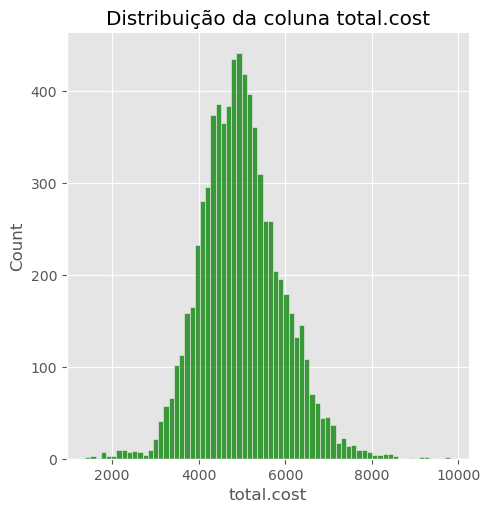

In [244]:
# Distribuição da variável 'total.cost' que contém CUSTO TOTAL DO VEÍCULO
sns.displot(df['total.cost'],color='green', kde=False)
plt.title('Distribuição da coluna total.cost')

Com a ajuda desse gráfico de distribuição, podemos observar que a maioria dos carros custam entre 4k a 6k.

#### Qual a quantidade média de dias que os carros ficam na concessionária?

Text(0.5, 1.0, 'Distribuição da coluna lot.sale.days')

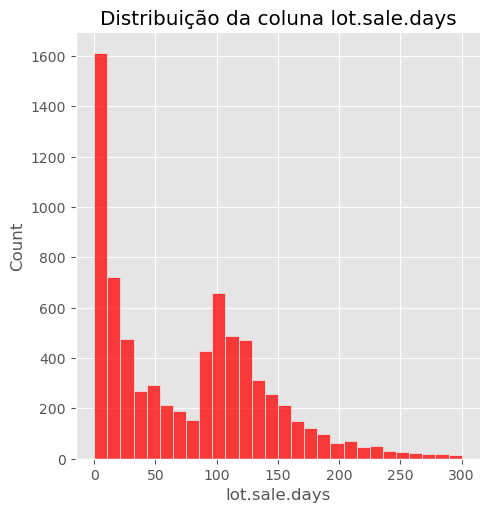

In [245]:
%matplotlib inline
sns.displot(df['lot.sale.days'],color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.days')

Podemos observar que os dias de vendas são inclinados para o lado esquerdo, isso nos mostra que a maioria dos veículos são vendidos nos primeiros 90 dias. Os restantes 20% são vendidos após 20 dias e são vendidos a preço de desconto.

#### Qual a quilometragem média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna mileage')

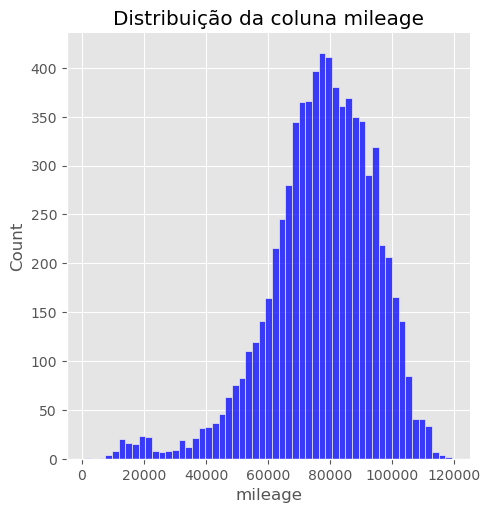

In [246]:
%matplotlib inline
sns.displot(df['mileage'],color='blue', kde=False)
plt.title('Distribuição da coluna mileage')

Podemos observar que a grande maioria dos veículos estão na faixa de 60.000 a 90.000 de quilometragem

#### Qual a idade média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna vehicle.age')

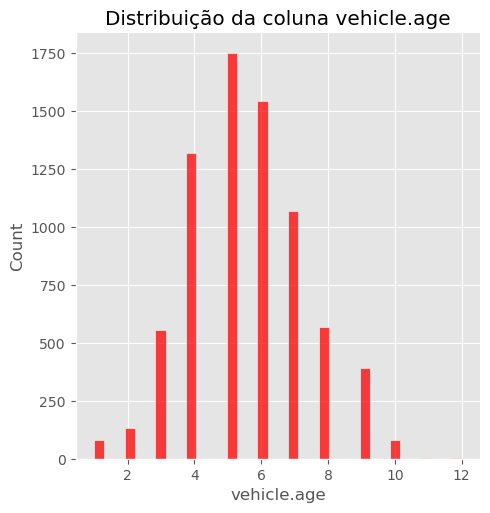

In [247]:
%matplotlib inline
sns.displot(df['vehicle.age'],color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')

Podemos observar que a idade média dos veículos da concessionária fica entre 4 a 7 anos.

#### Correlação entre variáveis

**Correlação de Pearson** mede a dependência linear entre duas variáveis X e Y. O coeficiente resultante é um valor entre -1 e 1, onde:
- +1: Correlação linear positiva (valores das variáveis tendem a aumentar juntos)
-  0: Sem correlação linear, provavelmente as variáveis não afetam uma à outra.
- -1: Correlação linear negativa (valores das variáveis tendem a diminuir juntos)

Portanto, podemos verificam o quanto uma variável numérica tem relação com outra, mas não indica necessariamente relação causal entre elas.

In [248]:
# Quilometragem X Idade X Dia para venda X Custo total
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


Para verificar a correlação, utiliza-se o método corr():

In [249]:
# Quilometragem X Idade X Dia para venda X Custo total
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


Nesse contexto, um mapa de calor pode apoiar a visualização:

<AxesSubplot:>

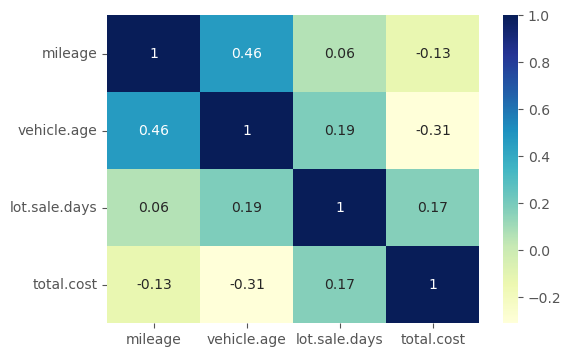

In [250]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

- O gráfico de calor acima nos mostra que não existe uma correlação forte das variáveis com a quantidade de dias de vendas(lot.sale.days)
- Podemos ver que a quilometragem (mileage) tem uma correlação positiva com a idade do veículo (vehicle.age)
- Podemos ver também que os dias de vendas (lot.sale.days) tem uma correlação positiva com o custo total do veículo (total.cost) e com a idade do veículo (vehicle.age)

#### Quantas modelos de veiculos temos na nossa base e a quantidade de cada um deles?

In [251]:
# Quantos
total_models = df['make.model'].nunique()
print("Total de modelos na base: ", total_models)

Total de modelos na base:  95


In [252]:
# Quais (quantidade respectiva)
df['make.model'].value_counts().to_frame()

,make.model
NISSAN.SENTRA,441
CHEVROLET.LUMINA,431
FORD.TAURUS,357
BUICK.LESABRE,271
PONTIAC.GRAND AM,269
...,...
CHRYSLER.FIFTH AVENUE,1
SUBARU.IMPREZA,1
SUBARU.LOYALE,1
INFINITI.I30,1


#### Quantas marcas e quais são as marcas de veículos?

In [253]:
# Quantas -> nunique()
df['makex'].nunique()

20

In [254]:
# Quais -> unique()
df['makex'].unique()

array(['BUICK', 'DODGE', 'OLDSMOBILE', 'KIA', 'CHEVROLET', 'MITSUBISHI',
       'FORD', 'MERCURY', 'PONTIAC', 'DAEWOO', 'NISSAN', 'GEO',
       'CHRYSLER', 'MAZDA', 'PLYMOUTH', 'TOYOTA', 'HONDA', 'HYUNDAI',
       'OTHER', 'CADILLAC'], dtype=object)

#### Quais os veículos com Idade maior que 11 anos?

In [255]:
df[df['vehicle.age'] > 11]

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
50,TRAIN,3767,233,YES,87086,FAMILY.MEDIUM,Domestic,12,SEVEN+,BLUE,OLDSMOBILE,VA,OLDSMOBILE.CIERA
209,TRAIN,2954,101,YES,115427,FAMILY.SMALL,Import,12,SEVEN+,GOLD,MAZDA,VA,MAZDA.626
2710,VALIDATE,2530,143,YES,108709,ECONOMY,Domestic,12,SEVEN+,WHITE,CHEVROLET,VA,CHEVROLET.CORSICA


#### Visualizando a dispersão entre os dias de vendas (lot.sale.days) e algumas variáveis

<AxesSubplot:xlabel='lot.sale.days', ylabel='total.cost'>

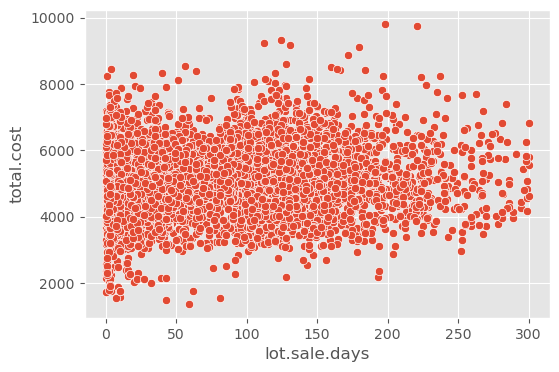

In [256]:
# lot.sale.days com total.cost

%matplotlib inline
plt.figure(figsize=(6,4))
sns.scatterplot(x='lot.sale.days', y="total.cost", data=df)

<AxesSubplot:xlabel='lot.sale.days', ylabel='mileage'>

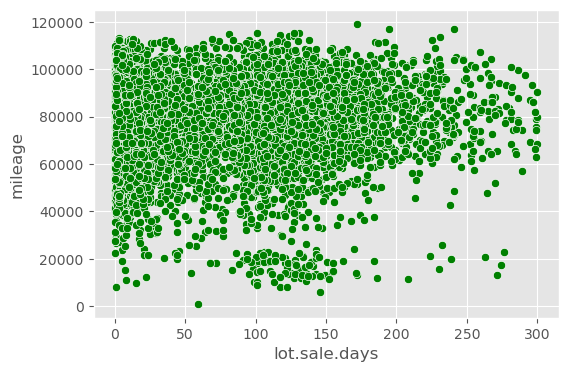

In [257]:
# lot.sale.days com mileage

%matplotlib inline
plt.figure(figsize=(6,4))
sns.scatterplot(x='lot.sale.days', y="mileage", color='green', data=df)

#### Tempo médio de venda de veiculos importados ou domésticos

<AxesSubplot:xlabel='domestic.import', ylabel='lot.sale.days'>

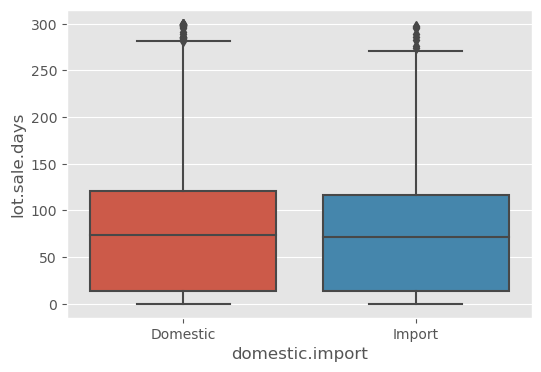

In [258]:
%matplotlib inline
plt.figure(figsize=(6,4))
sns.boxplot(x="domestic.import", y="lot.sale.days", data=df)

Não existem diferenças significativas entre veículos domésticos e veículos importados em termos de quão rápido eles são vendidos.

In [259]:
# Evidenciando com as médias e mediana de tempo para vender veiculos importados ou domesticos
df.groupby('domestic.import')['lot.sale.days'].agg(['mean', 'median']).sort_values(by='mean',ascending=False)

,mean,median
domestic.import,,
Domestic,77.845149,74.0
Import,73.293013,71.0


#### Tempo médio de vendas por categoria de veiculos

<AxesSubplot:xlabel='vehicle.type', ylabel='lot.sale.days'>

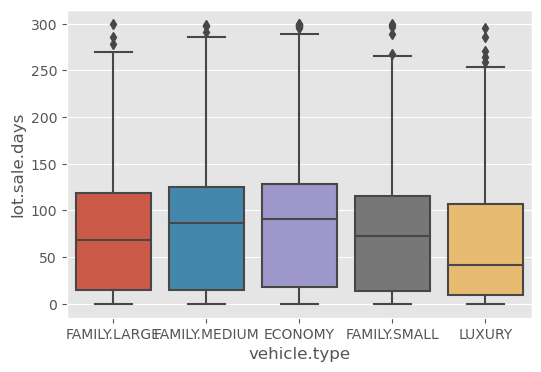

In [260]:
%matplotlib inline
plt.figure(figsize=(6,4))
sns.boxplot(x="vehicle.type", y="lot.sale.days", data=df)

- Veiculos econômicos demoram um pouco mais para serem vendidos se comparado veículos de família ou luxo.
- Em média, leva 85 dias para vender veículos econômicos, 75 dias para vender veículos de família e 60 dias para vender veículos de luxo.

In [261]:
# Para evitar o impacto de outliers, média pode ser substituida por mediana
df.groupby('vehicle.type')['lot.sale.days'].agg(['mean', 'median']).sort_values(by='mean',ascending=False)

,mean,median
vehicle.type,,
ECONOMY,85.266598,91.0
FAMILY.MEDIUM,80.699403,86.5
FAMILY.LARGE,74.015385,68.0
FAMILY.SMALL,73.287356,73.0
LUXURY,61.976459,41.0


#### Tempo médio de vendas por cor de Veiculos

<AxesSubplot:xlabel='color.set', ylabel='lot.sale.days'>

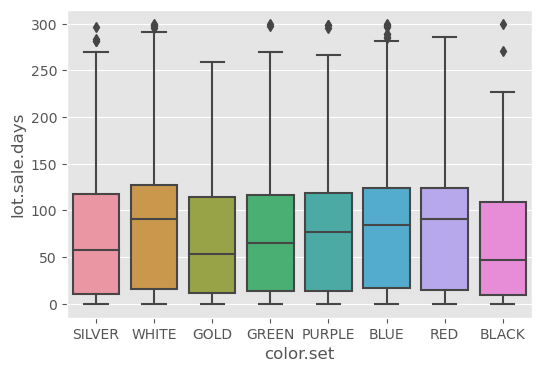

In [262]:
%matplotlib inline
plt.figure(figsize=(6,4))
sns.boxplot(x="color.set", y="lot.sale.days", data=df)

- Podemos observar que nesse gráfico que em média os carros que saem mais rápido são carros pretos.
- Em segundo lugar são carros dourados. 
- Por fim os carros que demoram mais para serem vendidos são carros brancos.

In [263]:
# Evidenciando a mediana (média pode ter impacto de outliers)
df.groupby('color.set')['lot.sale.days'].agg(['mean', 'median']).sort_values(by='mean',ascending=True)

,mean,median
color.set,,
BLACK,64.530917,47.0
GOLD,68.379360,53.0
SILVER,72.019417,58.0
GREEN,72.733054,65.0
PURPLE,75.536108,77.0
RED,81.741042,91.0
BLUE,81.835212,84.0
WHITE,83.302122,91.0


#### Tempo médio de vendas por marca dos veículos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BUICK'),
  Text(1, 0, 'DODGE'),
  Text(2, 0, 'OLDSMOBILE'),
  Text(3, 0, 'KIA'),
  Text(4, 0, 'CHEVROLET'),
  Text(5, 0, 'MITSUBISHI'),
  Text(6, 0, 'FORD'),
  Text(7, 0, 'MERCURY'),
  Text(8, 0, 'PONTIAC'),
  Text(9, 0, 'DAEWOO'),
  Text(10, 0, 'NISSAN'),
  Text(11, 0, 'GEO'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'MAZDA'),
  Text(14, 0, 'PLYMOUTH'),
  Text(15, 0, 'TOYOTA'),
  Text(16, 0, 'HONDA'),
  Text(17, 0, 'HYUNDAI'),
  Text(18, 0, 'OTHER'),
  Text(19, 0, 'CADILLAC')])

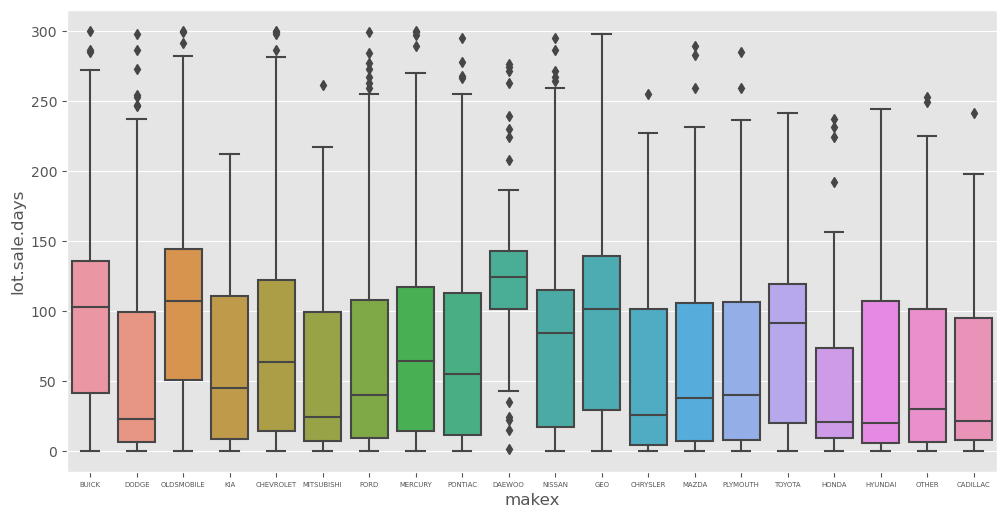

In [264]:
%matplotlib inline
sns.boxplot(x="makex", y="lot.sale.days", data=df)
plt.xticks(size=5)
# plt.show() # para exibir apenas o grafico (sem essa legenda dos xticks)

- Marcas tem uma grande diferença no tempo de vendas dos veículos.
- Algumas marcas de veículos quem vendem rápido tendem a ser Honda, Chrysler, Dodge, Hyundai, Plymouth.
- As marcas Daewoo, Oldsmobile, Buick e GEO permanecem por mais tempo antes de serem vendidos.

#### Tempo médio de vendas por estado

<AxesSubplot:xlabel='state', ylabel='lot.sale.days'>

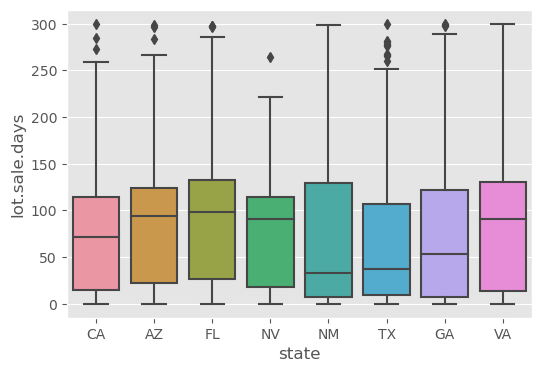

In [265]:
%matplotlib inline
plt.figure(figsize=(6,4))
sns.boxplot(x="state", y="lot.sale.days", data=df)

Alguns estados como California, Georgia e Texas tem diferença significante de dias para serem vendidos se comparado com Florida, Arizona e Virgínia.

In [266]:
# Evidenciando a mediana (média pode ter impacto de outliers)
df.groupby('state')['lot.sale.days'].agg(['mean', 'median']).sort_values(by='median',ascending=True)

,mean,median
state,,
NM,76.802691,33.0
TX,62.505455,37.0
GA,73.979508,53.5
CA,70.781474,71.0
NV,75.389558,91.0
VA,84.379613,91.0
AZ,83.430684,94.0
FL,91.315717,98.0


# Modelo de Machine Learning
Agora que já analisamos nossos dados, entendemos algumas correlações, dispersões e outras métricas, podemos seguir na criação de um modelo de aprendizagem de máquina.

In [267]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


#### Pré-processamento dos dados

Existem diversas etapas de pré-processamento de dados que são importantes para construir um bom modelo de machine learning. Algumas delas incluem:

- **Remover colunas irrelevantes**: como mencionado na sua pergunta, remover colunas que não possuem relevância para o problema em questão pode melhorar a qualidade dos resultados do modelo. Essas colunas podem incluir informações que não afetam diretamente o resultado final ou que são altamente correlacionadas com outras colunas.

- **Tratar valores ausentes**: é comum os dados coletados conterem valores ausentes. Esses valores precisam ser tratados antes do treinamento do modelo, pois eles podem levar a resultados imprecisos. Existem diversas técnicas para tratar valores ausentes, como preencher com valores médios ou medianos, remover as linhas que contêm valores ausentes ou usar algoritmos de imputação.

- **Adaptar colunas de valores categóricos**: muitas vezes, as colunas contêm valores categóricos, como cores ou tipos de produtos. Para transformar esses dados em um formato que possa ser usado pelo modelo, é necessário aplicar técnicas de codificação, como a codificação one-hot ou a codificação ordinal. A codificação one-hot cria uma nova coluna para cada valor categórico, enquanto a codificação ordinal atribui a cada valor categórico um valor numérico.

- **Normalização e padronização**: muitos modelos de machine learning são sensíveis à escala dos dados. Portanto, é importante normalizar ou padronizar as colunas que têm valores muito diferentes. A normalização ajusta os valores da coluna para uma escala entre 0 e 1, enquanto a padronização ajusta os valores da coluna para ter uma média de 0 e um desvio padrão de 1.

- **Remoção de outliers**: outliers são valores atípicos que podem distorcer os resultados do modelo. É importante identificá-los e removê-los antes do treinamento do modelo para evitar resultados imprecisos. Existem diversas técnicas para identificar outliers, como o uso de gráficos de dispersão ou a detecção de valores que estão muito acima ou abaixo da média.

Essas são apenas algumas das etapas de pré-processamento de dados que podem ser realizadas para construir um bom modelo de machine learning. O processo completo dependerá do conjunto de dados em questão e do problema a ser solucionado.

Para o nosso caso, além de remover colunas pouco relevantes ao modelo, precisaremos pré-processar algumas colunas, pois são categóricas.

In [268]:
# Removendo colunas não importantes (Exemplo: vehicle.age.group, data.set)
df.drop('vehicle.age.group', axis=1, inplace=True)
df.drop('data.set', axis=1, inplace=True)

In [269]:
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SILVER,BUICK,CA,BUICK.CENTURY
1,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,WHITE,DODGE,AZ,DODGE.NEON
2,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,4636,100,YES,58519,ECONOMY,Import,4,GOLD,KIA,NV,KIA.SEPHIA
4,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


Aplicando o **LabelEnconder** para a codificação das variáveis categóricas:
- *descategarizando* variáveis categóricas (transformando em variáveis numéricas)

In [270]:
# importando essa funcionalidade do scikit learn
from sklearn.preprocessing import LabelEncoder

Ao verificar nosso DataFrame, observamos 6 variáveis categorias, portanto:

In [271]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [272]:
# aplicando LabelEncoder nos dados categóricos
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

#### Dados transformados

In [273]:
# visualizando os 5 primeiros registros dos dados transformados
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


#### Separa a classe dos dados

A classe (target = y) aqui para nosso modelo será a variável: **overage**, que é a variável que mostra que o veículo foi vendido em menos de 90 dias ou não.

In [274]:
y = df['overage']
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

Para X, apagamos os atributos: **overage** (por ser o alvo em y) e **lot.sale.days** (para evitar viés):

In [275]:
X = df.drop(['lot.sale.days','overage'], axis=1)
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


#### Separando os dados de treino e teste

In [276]:
# importando essa funcionalidade do scikit learn
from sklearn.model_selection import train_test_split

In [277]:
# dividindo dados entrada (X) e alvo (y) entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

Visualizando os dados de treino:

In [278]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [279]:
y_treino.count()

5621

In [280]:
X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
1456,6068,90655,1,0,5,1,0,3,2
7361,6156,65826,2,0,3,2,12,6,61
149,5626,88024,2,0,5,3,6,1,37
5402,5137,87968,2,0,5,7,2,7,16
6554,4963,40062,2,0,3,3,12,6,60


In [281]:
y_treino.head()

1456    YES
7361     NO
149     YES
5402     NO
6554     NO
Name: overage, dtype: object

Visualizando os dados de teste:

In [282]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [283]:
y_teste.count()

1874

In [284]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
4766,6293,60783,0,0,5,7,5,2,33
2077,5548,95333,3,1,5,0,14,1,69
5381,3138,82318,1,0,8,1,6,1,38
6043,5294,80926,0,0,4,0,6,6,39
3882,4043,69320,3,0,4,1,18,6,83


#### Aplicando Machine Learning
- com Árvore de Decisão

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Referência: https://blogdozouza.wordpress.com/2019/09/30/decision-trees-e-random-forests-para-classificacao-e-regressao/

In [285]:
# importando
from sklearn import tree

In [286]:
# instanciando
arvore = tree.DecisionTreeClassifier()

In [287]:
# treinando
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

#### Validando o modelo 

In [288]:
# visualizando os dados de teste
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
4766,6293,60783,0,0,5,7,5,2,33
2077,5548,95333,3,1,5,0,14,1,69
5381,3138,82318,1,0,8,1,6,1,38
6043,5294,80926,0,0,4,0,6,6,39
3882,4043,69320,3,0,4,1,18,6,83


In [289]:
# predizendo os dados de teste
arvore.predict(X_teste)

array(['NO', 'YES', 'NO', ..., 'YES', 'YES', 'YES'], dtype=object)

In [290]:
# guardando a predição em variável
resultado = arvore.predict(X_teste)
resultado

array(['NO', 'YES', 'NO', ..., 'YES', 'YES', 'YES'], dtype=object)

Para avaliar o desempenho do modelo em relação as previsões em um conjunto de dados, segue as métricas mais comuns:

- Accuracy (acurácia): é a proporção das previsões corretas em relação ao total de previsões feitas pelo modelo.
- Precision (precisão): é a proporção das previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.
- Recall (revocação): é a proporção das previsões positivas corretas em relação ao total de amostras verdadeiramente positivas no conjunto de dados.
- F1-score: é a média harmônica entre precision e recall, que leva em conta tanto falsos positivos quanto falsos negativos.
- Support (suporte): é o número de amostras verdadeiras para cada classe presente no conjunto de dados.

Quando temos mais de uma classe no conjunto de dados, podemos também utilizar as seguintes métricas:

- Macro avg é a média aritmética das métricas por classe
- Weighted avg é a média ponderada pela proporção de amostras em cada classe

In [291]:
# utilizando métricas do sklearn
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

          NO       0.68      0.65      0.67      1033
         YES       0.59      0.62      0.61       841

    accuracy                           0.64      1874
   macro avg       0.64      0.64      0.64      1874
weighted avg       0.64      0.64      0.64      1874



#### Conclusões
- Tivemos precisão de 62% para classificar carros que superam os 90 dias
- O modelo pode melhorar se utilizar a Engenharia de Features.

#### Feature Engineering
- descobrindo as variáveis (features) mais importantes para o modelo usando Árvore de Decisão

In [292]:
# retornando array importância features -> maior valor, mais importante (OBTENDO IMPORTÂNCIAS)
arvore.feature_importances_

array([0.26617708, 0.21709956, 0.073258  , 0.01140408, 0.08271849,
       0.09654885, 0.03260009, 0.08434716, 0.13584668])

In [293]:
# melhorando a visualização com series (VISUALIZANDO IMPORTÂNCIAS)
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)
feature_imp

total.cost         0.266177
mileage            0.217100
vehicle.type       0.073258
domestic.import    0.011404
vehicle.age        0.082718
color.set          0.096549
makex              0.032600
state              0.084347
make.model         0.135847
dtype: float64

Melhorando a visualização das features mais importantes do modelo por meio de gráfico:

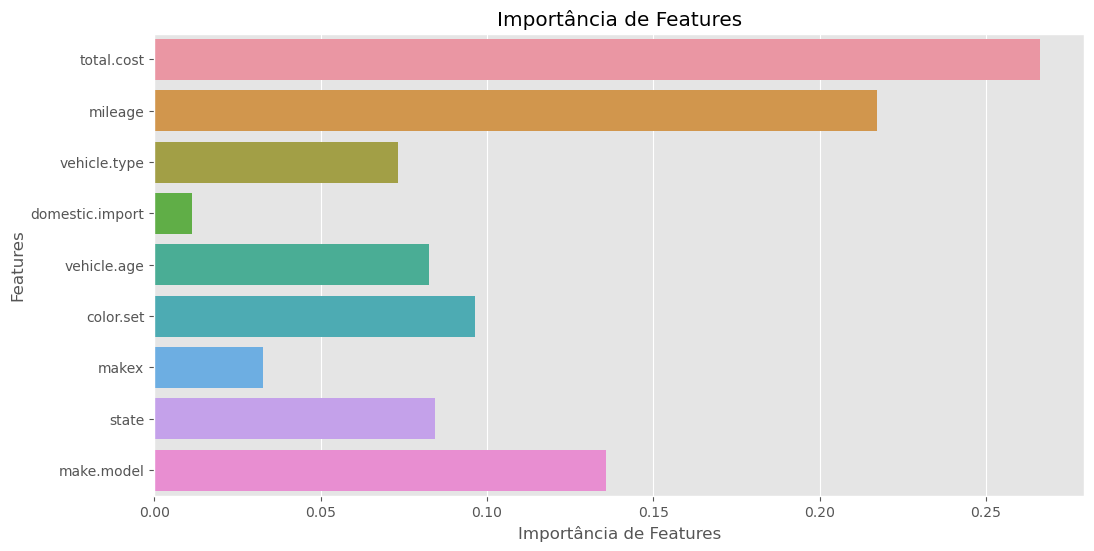

In [294]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title("Importância de Features")
plt.show()

#### Visualizando a Árvore de Decisão

In [300]:
# instalando bibliotecas para visualização no notebook
!pip install pydot
!pip install graphviz

In [301]:
# importando bibliotecas
import pydot
import graphviz 
from ipywidgets import interactive

In [302]:
dot_data = tree.export_graphviz(
         arvore,
         feature_names=X.columns,
         class_names=y,
         max_depth=3, 
         filled=True, 
         rounded=True,
         node_ids=True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Segue print da execução com sucesso:

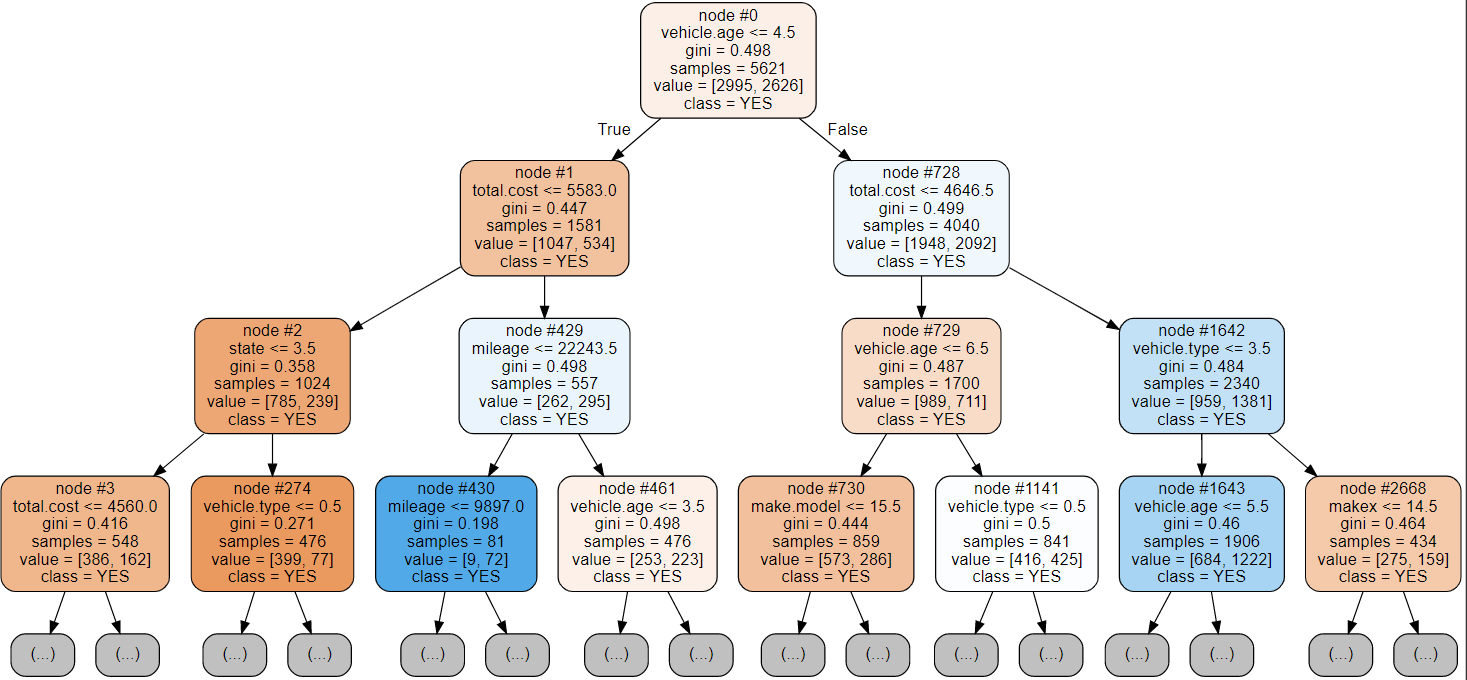

O nó que melhor separa os dados é o nó vehicle.age, em seguida o nó total.cost e mileage.